In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import h5py
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img
import os
import pandas as pd
import matplotlib.pyplot as plt
print(os.getcwd())


/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMG_WIDTH=256
IMG_HEIGHT=256
batch_size=32
train_dir = r'drive/MyDrive/Colab Notebooks/minor_dataset/train'
val_dir  = r'drive/MyDrive/Colab Notebooks/minor_dataset/test'
image_gen_train = ImageDataGenerator(rescale=1./255, 
                                    zoom_range=0.2, 
                                    rotation_range=65,
                                    shear_range=0.09,
                                    horizontal_flip=True,
                                    vertical_flip=True)
image_gen_val = ImageDataGenerator(rescale=1./255)


In [ ]:

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,directory=train_dir,shuffle=True,target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='sparse')
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,directory=val_dir,target_size=(IMG_HEIGHT, IMG_WIDTH),class_mode='sparse')

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [ ]:
print(train_data_gen.class_indices)

{'bad': 0, 'good': 1}


In [ ]:
model = Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

model.add(Conv2D(filters=64, kernel_size=3, strides=(2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=4, strides=(2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=4, strides=(2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))

model.add(Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 127, 127, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 128)       131200    
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 128)      512       
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
), metrics=['accuracy'])
checkpoint_filepath = './cnn_2/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    verbose=1,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
    

In [ ]:
with tf.device('/GPU:0'):
    # model.load_weights(checkpoint_filepath)
    history = model.fit(train_data_gen, epochs=20, batch_size=32, validation_data=val_data_gen,  callbacks=[model_checkpoint_callback])

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 2.1113 - accuracy: 0.5063
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./cnn_2/checkpoint
10/10 [==============================] - 136s 13s/step - loss: 2.1113 - accuracy: 0.5063 - val_loss: 0.7021 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 0.8283 - accuracy: 0.5000
Epoch 2: val_accuracy did not improve from 0.50000
10/10 [==============================] - 9s 946ms/step - loss: 0.8283 - accuracy: 0.5000 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 0.3673 - accuracy: 0.8625
Epoch 3: val_accuracy did not improve from 0.50000
10/10 [==============================] - 9s 939ms/step - loss: 0.3673 - accuracy: 0.8625 - val_loss: 1.6526 - val_accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 0.2291 - accuracy: 0.9344
Epoch 4: val_accuracy did not improve fro

In [ ]:
model.load_weights(checkpoint_filepath)
model.evaluate(train_data_gen)
model.evaluate(val_data_gen)

3/3 [==============================] - 1s 326ms/step - loss: 0.2791 - accuracy: 0.8625


[0.2790880799293518, 0.862500011920929]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


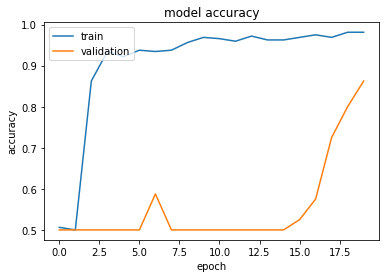

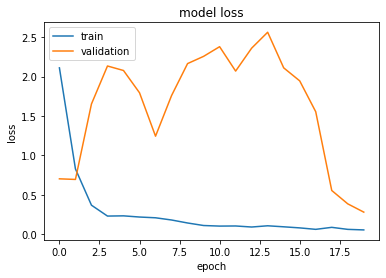

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
model.save("model_cnn_2.h5")

In [ ]:
! pip install streamlit -q

     |████████████████████████████████| 10.3 MB 4.2 MB/s 
     |████████████████████████████████| 182 kB 61.8 MB/s 
     |████████████████████████████████| 4.7 MB 44.9 MB/s 
     |████████████████████████████████| 237 kB 70.0 MB/s 
     |████████████████████████████████| 164 kB 68.5 MB/s 
     |████████████████████████████████| 78 kB 8.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 51 kB 8.3 MB/s 


In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st
st.set_option('deprecation.showfileUploaderEncoding', False)

@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/model_cnn_2.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Fooq Quality Evaluation
         """
         )

file = st.file_uploader("Please upload scan file", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np

def import_and_predict(image_data, model):
    
        size = (256,256)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(prediction)
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Overwriting app.py


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2022-11-29 07:09:21--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.161.241.46, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  25.8MB/s    in 0.5s    

2022-11-29 07:09:22 (25.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]



In [ ]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
get_ipython().system_raw('./ngrok http 8501 &')

In [ ]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.7/json/__init__.py", line 296, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


In [ ]:
!streamlit run /content/app.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8502
  External URL: http://34.71.212.238:8502

